In [12]:
import math
from matplotlib import pylab as plt
from scipy import optimize
from scipy import interpolate
import numpy as np

%matplotlib inline

# Задача 1. Минимизация гладкой функции

In [30]:
def f(x):
    return math.sin(x / 5.) * math.exp(x / 10.) + 5 * math.exp(-x / 2.)

In [31]:
def test(x):
    return x ** 2

In [32]:
#test
#map(test, range(10))
#plt.plot([range(1, 10)], [map(test, range(1, 10))])
#plt.scatter([range(1, 10)], [map(test, range(1, 10))])
#plt.show()

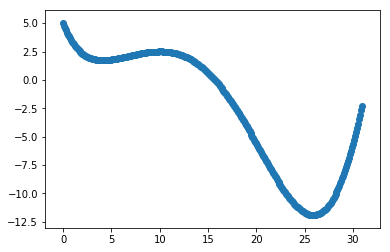

In [61]:
plt.plot([np.arange(0, 31, 0.1)], [map(f, np.arange(0, 31, 0.1))], '-')
#new = interpolate.interp1d([range(-10, 30)], [map(f, range(-10, 30))], kind='linear')
plt.scatter([np.arange(0, 31, 0.1)], [map(f, np.arange(0, 31, 0.1))])
#plt.scatter([range(0, 31)], [map(new, range(0, 31))])
plt.show()

In [66]:
#5
#optimize.minimize(f, 11)
optimize.minimize(f, 10)
# результат меняется 

      fun: 1.7452682903427892
 hess_inv: array([[6.04855707]])
      jac: array([1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 3
     njev: 13
   status: 0
  success: True
        x: array([4.13630013])

In [69]:
#6
optimize.minimize(f, 2, method='BFGS')
#1.75
#print(f(1.7452682903427892) > f(1.745268290344928))

      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])

In [89]:
#7
optimize.minimize(f, 30, method='BFGS')
#-11.90

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

# Задача 2. Глобальная оптимизация

In [88]:
optimize.differential_evolution(f, [(1, 30)])

     fun: -11.898894665981322
     jac: array([1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 3
 success: True
       x: array([25.88019308])

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult

Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

# Задача 3. Минимизация негладкой функции


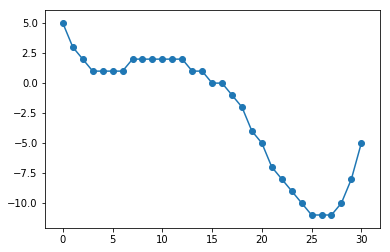

In [137]:
def decorator0(func):
    def wrap(args):
        return int(func(args))
    return wrap

new_f = decorator0(f)


#plt.plot((0, 1, 2, 3, 4, 5, 6, 7), (0, 3, 1, 2, 1, 5, 4, 0))
#plt.show()

fig = plt.figure()
# оси x и y
plt.plot(np.arange(0, 31, 1), map(new_f, np.arange(0, 31, 1)))
#new = interpolate.interp1d([range(-10, 30)], [map(new_f, range(-10, 30))], kind='linear')
plt.scatter(np.arange(0, 31, 1), map(new_f, np.arange(0, 31, 1)))
#plt.scatter([range(0, 31)], [map(new_f, range(0, 31))])
plt.show()

In [146]:
#3
optimize.minimize(new_f, 30, method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [147]:
#4
optimize.differential_evolution(new_f, [(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([27.44175341])

In [106]:
def decorator0(func):
    def wrap(*args):
        return [map(int, func(*args))]
    return wrap

def testik(glist):
    return [float(i ** 2) for i in glist]

print(testik([1,2,3]))
lol = decorator0(testik)

print(lol([1,2,3]))


[1.0, 4.0, 9.0]
[[1, 4, 9]]


In [133]:
np.arange(0, 31, 1)



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [134]:
[np.arange(0, 31, 1)]

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])]